In [109]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [110]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
df.isnull().values.any()
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
5,1325318220,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
6,1325318280,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
7,1325318340,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
8,1325318400,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
9,1325318460,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [111]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.472579
2012-01-01    4.680778
2012-01-02    5.000000
2012-01-03    5.145917
2012-01-04    5.195443
Name: Weighted_Price, dtype: float64

In [125]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [126]:
new_df.head()

,Close
Date,
2011-12-31,4.472579
2012-01-01,4.680778
2012-01-02,5.000000
2012-01-03,5.145917
2012-01-04,5.195443


Text(0,0.5,'$(Dollar)')

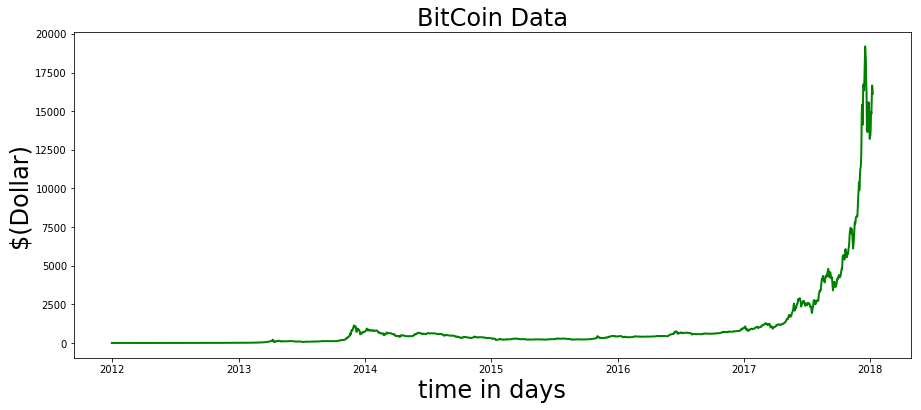

In [136]:
plt.plot(new_df,color='green', lw=2)
plt.title("BitCoin Data",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

In [115]:
# df = df[['Close']]
df=new_df
forecast_out = int(20)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2,random_state=0)

clf = LinearRegression()
clf.fit(X_train,y_train)

cross_validation = clf.predict(X_test)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

confidence:  0.8978825108754992
[19582.84566352 18870.27650731 16007.82035009 17178.45751192
 15883.48178917 16246.67049249 17733.68553155 18125.91840804
 16574.34798137 16908.0469525  15366.05727157 15516.79321578
 15617.62501585 16145.25003445 17407.59311306 17237.98470444
 18371.18597287 19389.18669275 19215.93690059 18757.47686024]


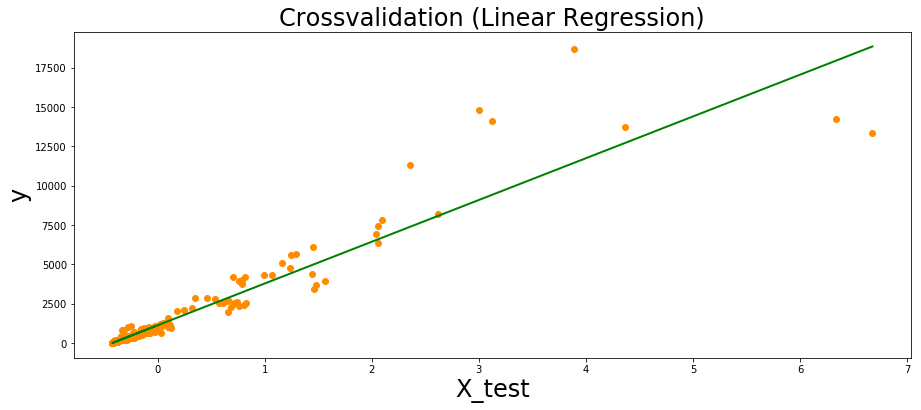

In [140]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='test_data')
plt.plot(X_test, cross_validation, color='green', linewidth=2,label='predicted data')
# plt.plot(new_df,color='green', lw=2)
plt.title("Crossvalidation (Linear Regression)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

670.3494985198671


In [118]:
last_date = new_df.iloc[-1].name
print(last_date)

2018-01-08


In [122]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
df1 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df1 =df1.set_index('Date')
df1.info()
print(df.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-01-08 to 2018-01-27
Data columns (total 1 columns):
Close    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Close  Prediction
Date                            
2011-12-31  4.472579    6.655063
2012-01-01  4.680778    6.887750
2012-01-02  5.000000    6.614472
2012-01-03  5.145917    6.543410
2012-01-04  5.195443    6.506604


Text(0,0.5,'$(Dollar)')

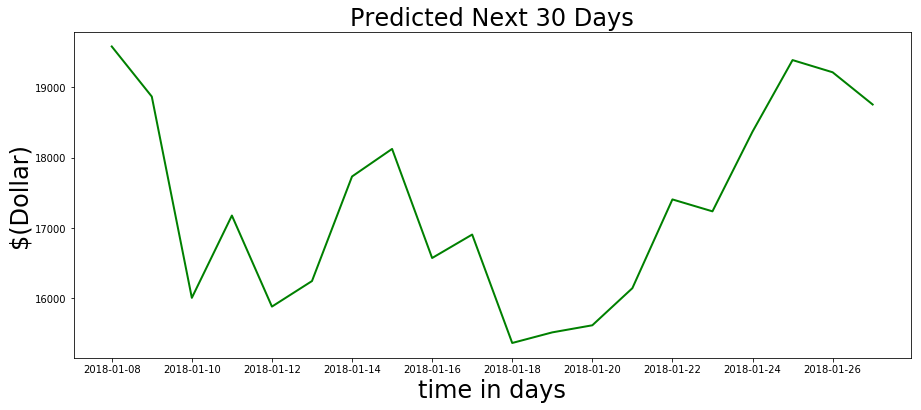

In [141]:
# # df['Close'].plot()
# df1['Close'].plot()
# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()
plt.plot(df1,color='green', lw=2)
plt.title("Predicted Next 30 Days",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

Text(0,0.5,'$(Dollar)')

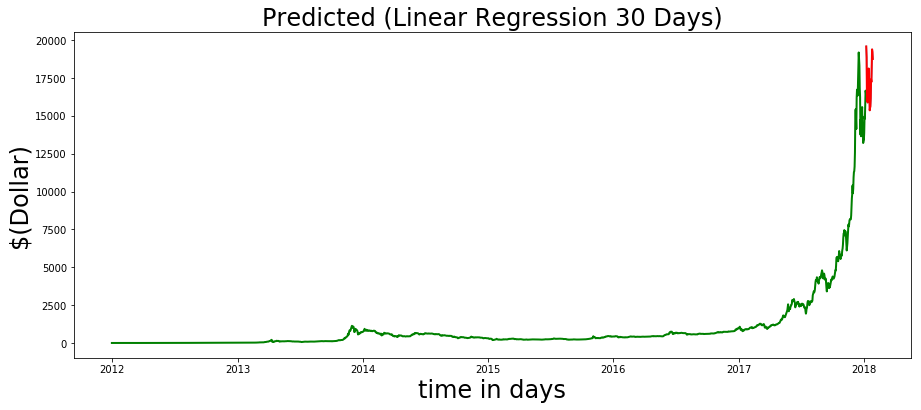

In [144]:
# plt.figure(figsize=(12,8))
# plt.plot(df['Close'], label='Train')
# plt.plot(df1['Close'], label='Predicted')
# # plt.plot(X_test['Close'], label='Test')
# # plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
# plt.legend(loc='best')
# plt.show()

plt.plot(df1,)
plt.plot(df['Close'],color='green', lw=2, label='Bitcoin Data')
plt.plot(df1['Close'],color='red', lw=2, label='Predicted')
plt.title("Predicted (Linear Regression 30 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
